In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# checking for CUDA
if torch.cuda.is_available():
  print("GPU !")
else:
  print("CPU !")

CPU !


In [ ]:
# dataset path
data_path = "/content/drive/MyDrive/Leukemia/train_set"
demo_path = "/content/drive/MyDrive/Leukemia/"

In [ ]:
# ALL train
# train_all = "/content/drive/MyDrive/Leukemia/train_set/ALL/"
# train_hem = "/content/drive/MyDrive/Leukemia/train_set/HEM/"
train_all = "/content/drive/MyDrive/Leukemia/hsv_train/ALL/"
train_hem = "/content/drive/MyDrive/Leukemia/hsv_train/HEM/"

In [ ]:
# destination
# dest_aug = "/content/drive/MyDrive/Leukemia/aug_train/"
dest_aug = "/content/drive/MyDrive/Leukemia/hsv_aug/"

In [ ]:
# class names
classes = ['HEM', 'ALL']

In [ ]:
# copying image

import shutil
import os
k = 0

original = train_all
target = dest_aug

src_files = os.listdir(original)

for file_name in src_files:
  # if k==3:
  #   break
  full_file_name = os.path.join(original, file_name)
  if os.path.isfile(full_file_name):
    # print(full_file_name)
    shutil.copy(full_file_name, target)
    k += 1

print(f"total {k} images are copied!")

total 2500 images are copied!


In [ ]:
# # class 0 --> ALL
# class_0 = 0
# # class 1 --> HEM
# class_1 = 1

# # taking a list
# annotated_data = []
# annotated_data.clear()

import shutil
hsv_aug_s = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/"
count_10 = 0
# dest_aug = train_all
for file in os.listdir(hsv_aug_s):
  # if count_10 == 5:
  #   break
  # check if current path is a file
  if os.path.isfile(os.path.join(hsv_aug_s, file)):
    # print(file)
    count_10 += 1
print(f"Total ALL images in folder 1 is: {count_10}")

Total ALL images in folder 1 is: 10000


In [ ]:
count_10 = 0
# dest_aug = train_all
for file in os.listdir(train_all):
  # if count_10 == 5:
  #   break
  # check if current path is a file
  if os.path.isfile(os.path.join(train_all, file)):
    # print(file)
    count_10 += 1
print(f"Total ALL images in folder 1 is: {count_10}")

Total ALL images in folder 1 is: 2500


In [ ]:
# creating a csv file with corresponding labels
annotated_data = []
annotated_data.clear()
print(len(annotated_data))
count_10 = 0
for file in os.listdir(train_hem):
    # check if current path is a file
    if os.path.isfile(os.path.join(train_hem, file)):
        # print(file)
        annotated_data.append([file, 0])
        count_10 += 1
print(f"Total ALL images in folder 1 is: {count_10}")
print(f"labels inserted for {len(annotated_data)}")

0
Total ALL images in folder 1 is: 2500
labels inserted for 2500


In [ ]:
# for HEM
count_10 = 0
# train_all = dest_aug
for file in os.listdir(train_all):
    # check if current path is a file
    if os.path.isfile(os.path.join(train_all, file)):
        # print(file)
        annotated_data.append([file, 1])
        count_10 += 1
print(f"Total ALL images in folder 1 is: {count_10}")
print(f"labels inserted for {len(annotated_data)}")

Total ALL images in folder 1 is: 2500
labels inserted for 5000


In [ ]:
# dest
dest = "/content/drive/MyDrive/Leukemia/"
print(len(annotated_data))

5000


In [ ]:
import csv
with open(dest+'hsv_train_annotations.csv', 'w', encoding='UTF8', newline='') as d:
    writer = csv.writer(d)
    # write multiple rows
    writer.writerows(annotated_data)

In [ ]:
org_train = "/content/drive/MyDrive/Leukemia/hsv_aug/"
train_labels = dest+'hsv_train_annotations.csv'
print(train_labels)

/content/drive/MyDrive/Leukemia/hsv_train_annotations.csv


In [ ]:
from skimage import io
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import cv2

# creating a custom Dataset
class CustomDataset_v2(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, num_transformation=None):
        self.annotations = pd.read_csv(csv_file, header=None)
        self.root_dir = root_dir
        self.transform = transform
        self.num_transformation = num_transformation

    def __len__(self):
        return len(self.annotations)* self.num_transformation    # returns total number of images
        # Eita ektu thik korte hobe
        #return len(self.loaded_data)

    # returns specific image and coresponding target
    def __getitem__(self, index):
        image_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        # image = io.imread(image_path)
        image = cv2.imread(image_path, 1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        self.loaded_data = []

        if type(self.transform) == list:
            img_data = []
            label_data = []

            for tfm in self.transform:
                image = tfm(image)
                self.loaded_data.append((image, y_label))
#                 img_data.append(image)
#                 label_data.append(y_label)

#             label_data = torch.LongTensor(label_data)
            #return torch.stack(img_data, dim=0), label_data
#             return img_data, label_data

            return self.loaded_data

        else:
            image = self.transform(image)
            return image, y_label

In [ ]:
#transforms to increase dataset size
# Here we are transforming a single image with 5 different versions

t0 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

t1 = transforms.Compose([
    t0, transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1)
])

t4 = transforms.Compose([
    t0, transforms.RandomRotation((0,180)),
    transforms.Resize(size=(224, 224))
])

t5 = transforms.Compose([
    t0, transforms.CenterCrop(150),
    transforms.Resize(size=(224, 224))
])

transform_tr = [t0, t1, t4, t5]

In [ ]:
img_org = "/content/drive/MyDrive/Leukemia/HEM-234_0.png"
img_flip = "/content/drive/MyDrive/Leukemia/HEM-234_1.png"
img_rotate = "/content/drive/MyDrive/Leukemia/HEM-234_2.png"
img_crp = "/content/drive/MyDrive/Leukemia/HEM-234_3.png"

In [ ]:
from skimage import io
import os
import cv2
import matplotlib.pyplot as plt

img_list = []
name_list = []


img_org = cv2.imread(img_org, 1)
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
img_list.append(img_org)
name_list.append('Original')

img_flip = cv2.imread(img_flip, 1)
img_flip = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)
img_list.append(img_flip)
name_list.append('Vertical/Horizontal flip')

img_rotate = cv2.imread(img_rotate, 1)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2RGB)
img_list.append(img_rotate)
name_list.append('Random rotation')

img_crp = cv2.imread(img_crp, 1)
img_crp = cv2.cvtColor(img_crp, cv2.COLOR_BGR2RGB)
img_list.append(img_crp)
name_list.append('Random crop')

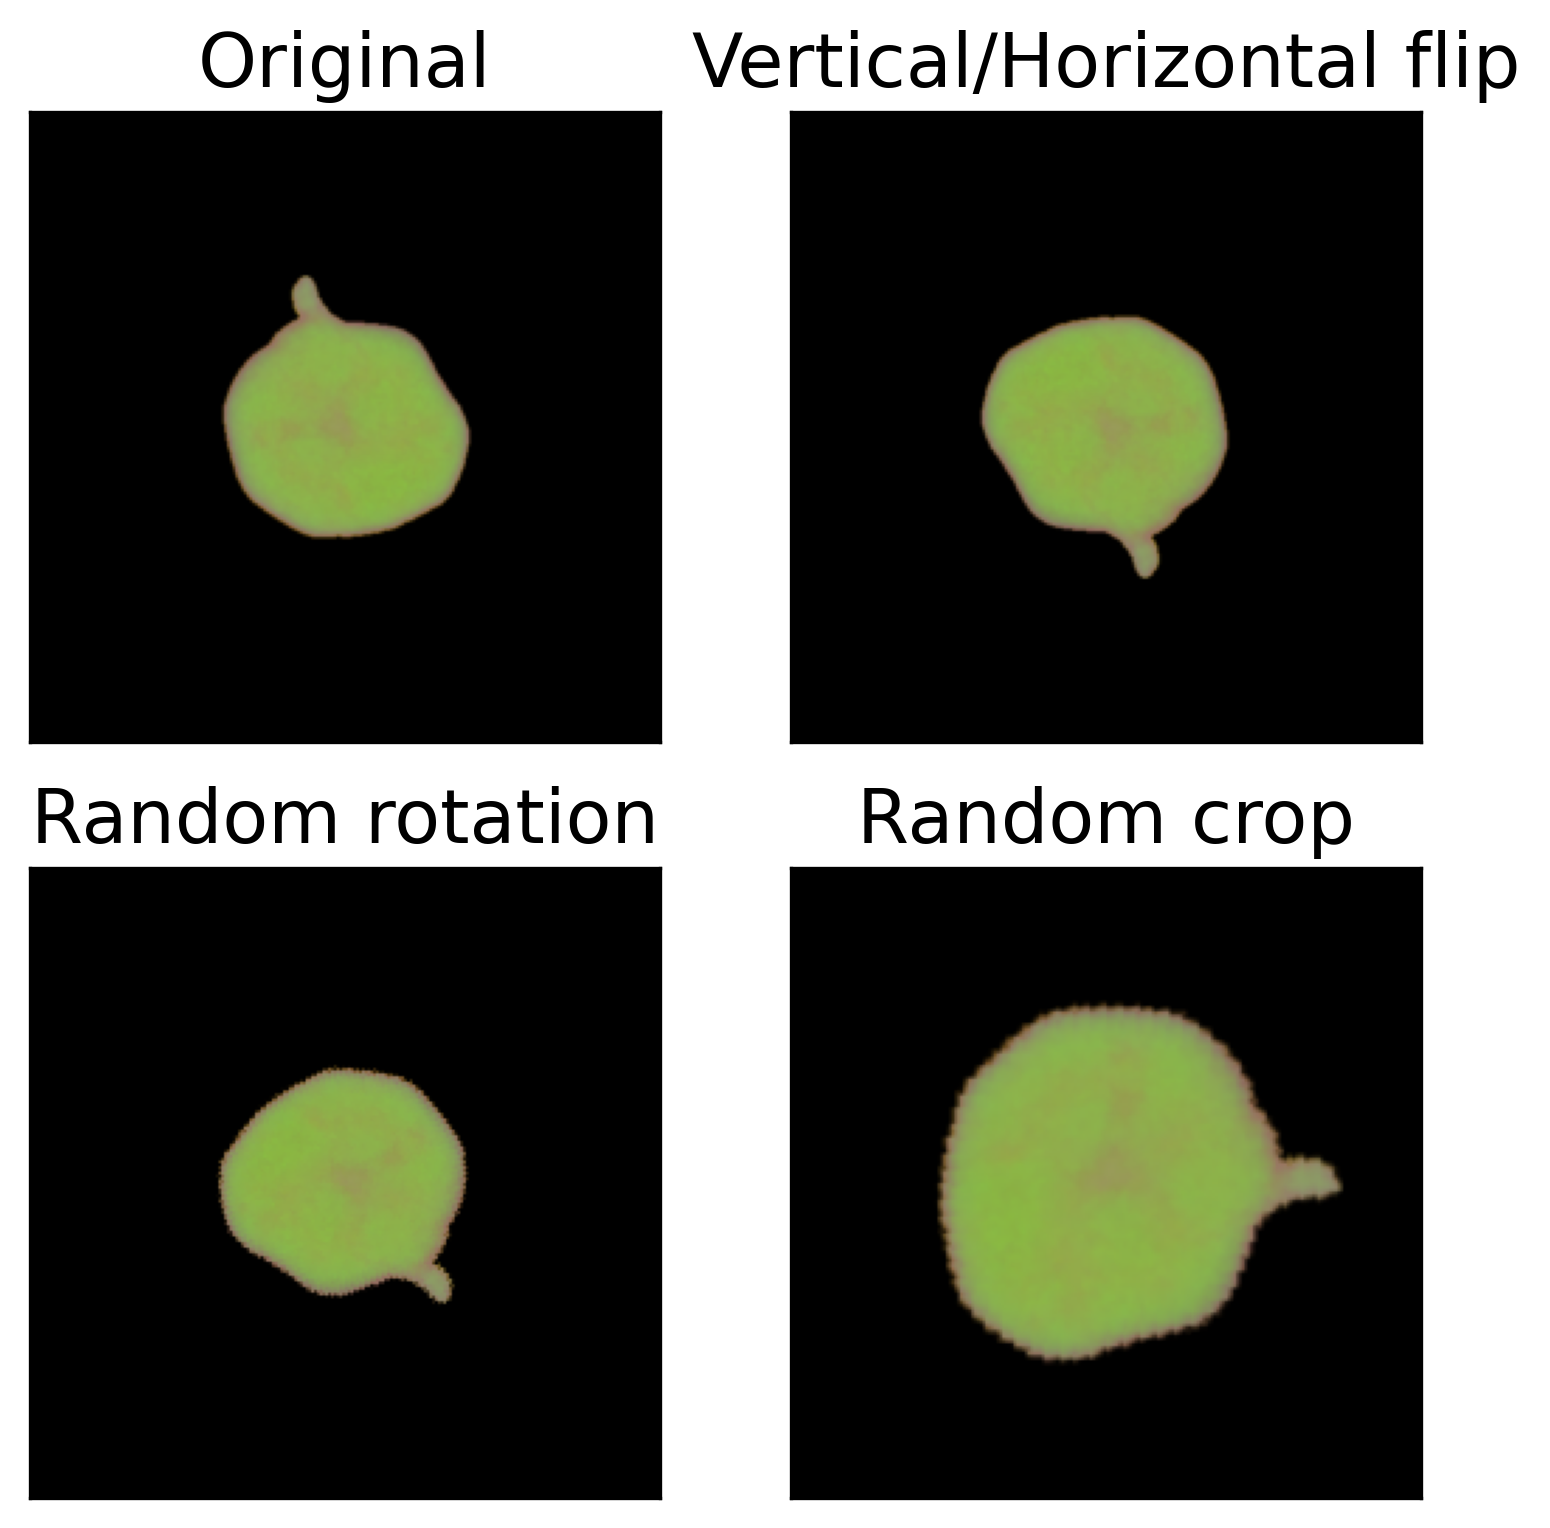

In [ ]:
# plotting images
# showing rgb image alongwith its colorspace converted images
fig = plt.figure(figsize=(6,6))
# change resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300



ax= fig.add_subplot(2, 2, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[0])
ax.set_title(name_list[0], fontsize=18)

ax= fig.add_subplot(2,2,2)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[1])
ax.set_title(name_list[1], fontsize=18)

ax = fig.add_subplot(2,2,3)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[2])
ax.set_title(name_list[2], fontsize=18)

ax = fig.add_subplot(2,2,4)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[3])
ax.set_title(name_list[3], fontsize=18)


plt.savefig('/content/drive/MyDrive/Leukemia/results/aug_method_2.png')
plt.show()
# plt.show()

In [ ]:
augmented_trainset = CustomDataset_v2(csv_file= train_labels, root_dir= org_train,
                       transform= transform_tr, num_transformation=3+1)

In [ ]:
print("Total training Examples: ",len(augmented_trainset))

Total training Examples:  20000


shape of image: (224, 224, 3)


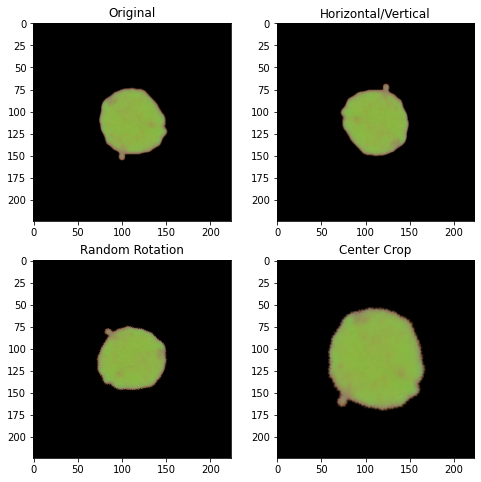

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# dataset_[ith element][img of ith element][label of ith element]
# Sample visualization

m_0 = np.array(TF.to_pil_image(augmented_trainset[1111][0][0]))
m_1 = np.array(TF.to_pil_image(augmented_trainset[1111][1][0]))
m_2 = np.array(TF.to_pil_image(augmented_trainset[1111][2][0]))
m_3 = np.array(TF.to_pil_image(augmented_trainset[1111][3][0]))

# m_0 = m_0.numpy()
# m_1 = m_1.numpy()
# m_2 = m_2.numpy()
# m_3 = m_3.numpy()

print(f"shape of image: {m_0.shape}")

fig = plt.figure(figsize=(8,8))

ax2= fig.add_subplot(2,2,1)
plt.imshow(m_0)
ax2.title.set_text("Original")

ax3 = fig.add_subplot(2,2,2)
plt.imshow(m_1)
ax3.title.set_text("Horizontal/Vertical")

ax4= fig.add_subplot(2,2,3)
plt.imshow(m_2)
ax4.title.set_text("Random Rotation")

ax5 = fig.add_subplot(2,2,4)
plt.imshow(m_3)
ax5.title.set_text("Center Crop")
# plt.savefig("/content/drive/MyDrive/Leukemia/augmentation_demo.png", dpi= 300)
plt.show()

In [ ]:
# saving augmented images into directory]


torch.Size([3, 224, 224])

In [ ]:
print(m_0.shape)
io.imsave("/content/drive/MyDrive/Leukemia/aaa_mmm.png", m_0)

(224, 224, 3)


In [ ]:
from torchvision.utils import save_image
save_image(augmented_trainset[1111][0][0], "/content/drive/MyDrive/Leukemia/aaa_mmm_2.png")

In [ ]:
# saving augmented images
from torchvision.utils import save_image
all_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/"
hem_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/"

class_0 = 1
class_1 = 1

hem = 0
all = 0
k = 0
for i in range(len(augmented_trainset)):
  # if k==5:
  #   break
  label = int(augmented_trainset[i][0][1])
  if label == 0:
    # defining image name for each class
    img_name_0 = classes[0] +'-' +str(class_0) +'_0.png'
    img_name_1 = classes[0] +'-' +str(class_0) +'_1.png'
    img_name_2 = classes[0] +'-' +str(class_0) +'_2.png'
    img_name_3 = classes[0] +'-' +str(class_0) +'_3.png'
    # getting images for each original image
    img0 = augmented_trainset[i][0][0]
    img1 = augmented_trainset[i][1][0]
    img2 = augmented_trainset[i][2][0]
    img3 = augmented_trainset[i][3][0]
    #saving images
    save_image(img0, hem_path+ img_name_0)
    save_image(img1, hem_path+ img_name_1)
    save_image(img2, hem_path+ img_name_2)
    save_image(img3, hem_path+ img_name_3)
    print(f"{class_0} HEM done...")
    class_0 += 1
    hem += 4

  if label == 1:
    # defining image name for each class
    img_name_0 = classes[1] +'-' +str(class_1) +'_0.png'
    img_name_1 = classes[1] +'-' +str(class_1) +'_1.png'
    img_name_2 = classes[1] +'-' +str(class_1) +'_2.png'
    img_name_3 = classes[1] +'-' +str(class_1) +'_3.png'
    # getting images for each original image
    img0 = augmented_trainset[i][0][0]
    img1 = augmented_trainset[i][1][0]
    img2 = augmented_trainset[i][2][0]
    img3 = augmented_trainset[i][3][0]
    #saving images
    save_image(img0, all_path+ img_name_0)
    save_image(img1, all_path+ img_name_1)
    save_image(img2, all_path+ img_name_2)
    save_image(img3, all_path+ img_name_3)
    print(f"{class_1} ALL done...")
    class_1 += 1
    all += 4
  k += 1
  if k >= 5000:
    break
print(f"total {class_0-1} HEM images are found for augmentation...")
print(f"total {hem} HEM images are saved after augmentation!")
print(f"total {class_1-1} ALL images are found for augmentation...")
print(f"total {all} ALL images are saved after augmentation!")

Streaming output truncated to the last 5000 lines.
5 HEM done...
6 HEM done...
7 HEM done...
8 HEM done...
9 HEM done...
10 HEM done...
11 HEM done...
12 HEM done...
13 HEM done...
14 HEM done...
15 HEM done...
16 HEM done...
17 HEM done...
18 HEM done...
19 HEM done...
20 HEM done...
21 HEM done...
22 HEM done...
23 HEM done...
24 HEM done...
25 HEM done...
26 HEM done...
27 HEM done...
28 HEM done...
29 HEM done...
30 HEM done...
31 HEM done...
32 HEM done...
33 HEM done...
34 HEM done...
35 HEM done...
36 HEM done...
37 HEM done...
38 HEM done...
39 HEM done...
40 HEM done...
41 HEM done...
42 HEM done...
43 HEM done...
44 HEM done...
45 HEM done...
46 HEM done...
47 HEM done...
48 HEM done...
49 HEM done...
50 HEM done...
51 HEM done...
52 HEM done...
53 HEM done...
54 HEM done...
55 HEM done...
56 HEM done...
57 HEM done...
58 HEM done...
59 HEM done...
60 HEM done...
61 HEM done...
62 HEM done...
63 HEM done...
64 HEM done...
65 HEM done...
66 HEM done...
67 HEM done...
68 HEM do

In [ ]:
print(len(augmented_trainset))

20000
